# PV Forecasting
## Multiple Linear Regression

### Import Libraries

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns; sns.set(font_scale = 1.2)

In [2]:
# From

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
%matplotlib inline

### Data

In [3]:
# Read PV and Weather data

pw = pd.read_csv('BMS January Power Weather Data CSV.csv')
print("Keys of pw: \n{}".format(pw.keys()))

Keys of pw: 
Index(['DATE (MM/DD/YYYY)', 'MST', 'Time', 'Power', 'Irradiance',
       'Temperature', 'CloudCover', '5 min', 'Boolean'],
      dtype='object')


In [4]:
pw.head()

,DATE (MM/DD/YYYY),MST,Time,Power,Irradiance,Temperature,CloudCover,5 min,Boolean
0,1/1/2006,7:29,7.48,0.0,3.2,6.3,-1.0,5,1
1,1/1/2006,7:34,7.57,0.0,5.5,6.4,-1.0,10,1
2,1/1/2006,7:39,7.65,0.1,8.3,6.5,-1.0,15,1
3,1/1/2006,7:44,7.73,0.2,12.4,6.9,-1.0,20,1
4,1/1/2006,7:49,7.82,0.3,18.9,6.8,7.0,25,1


In [5]:
pw.tail()

,DATE (MM/DD/YYYY),MST,Time,Power,Irradiance,Temperature,CloudCover,5 min,Boolean
3588,1/31/2006,16:53,16.88,0.1,19.2,7.2,2.0,17945,1
3589,1/31/2006,16:58,16.97,0.1,14.2,6.9,2.0,17950,1
3590,1/31/2006,17:03,17.05,0.1,11.5,6.6,-1.0,17955,1
3591,1/31/2006,17:08,17.13,0.0,8.8,6.4,-1.0,17960,1
3592,1/31/2006,17:13,17.22,0.0,6.2,6.1,-1.0,17965,1


In [6]:
# Number of rows and colums
pw.shape

(3593, 9)

In [7]:
# Statical detail of the dataset
pw.describe()

,Time,Power,Irradiance,Temperature,CloudCover,5 min,Boolean
count,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000,3593.0
mean,12.174615,39.025605,305.429084,6.778709,19.282772,8985.000000,1.0
std,2.791182,24.955700,192.839586,5.576978,30.115288,5186.770431,0.0
min,7.220000,0.000000,1.200000,-7.900000,-1.000000,5.000000,1.0
25%,9.770000,16.500000,126.600000,2.900000,0.000000,4495.000000,1.0
50%,12.170000,42.300000,306.400000,7.000000,3.000000,8985.000000,1.0
75%,14.580000,62.400000,485.200000,10.600000,26.000000,13475.000000,1.0
max,17.230000,79.200000,773.900000,19.800000,99.000000,17965.000000,1.0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


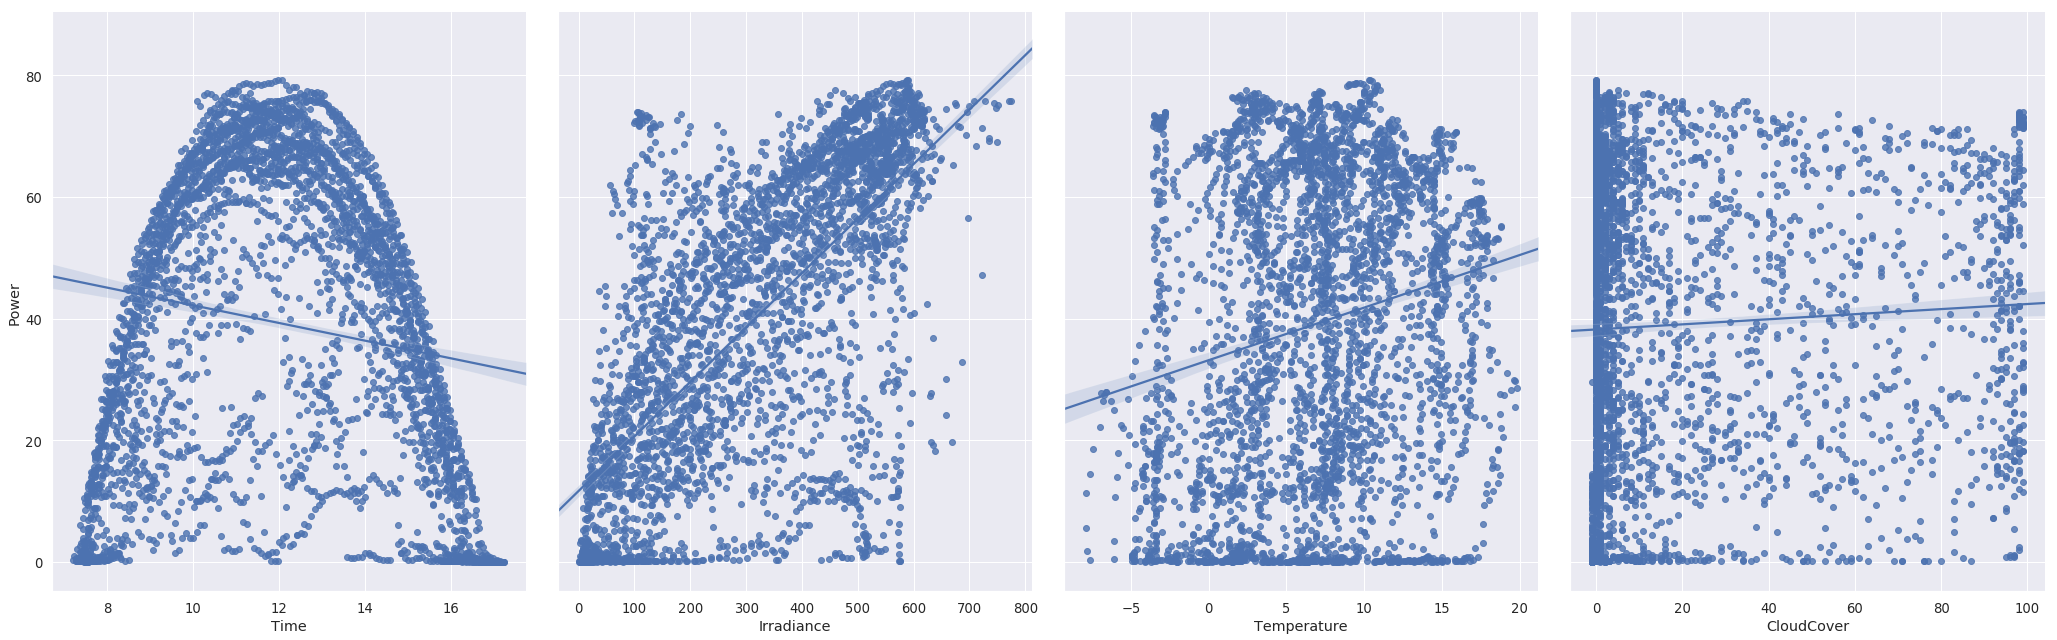

In [8]:
# Visualize the relationship between Power Generated and Weather using scatterplots
sns.pairplot(pw, x_vars=['Time','Irradiance', 'Temperature','CloudCover'], y_vars='Power', height=9, aspect=0.8, kind='reg')

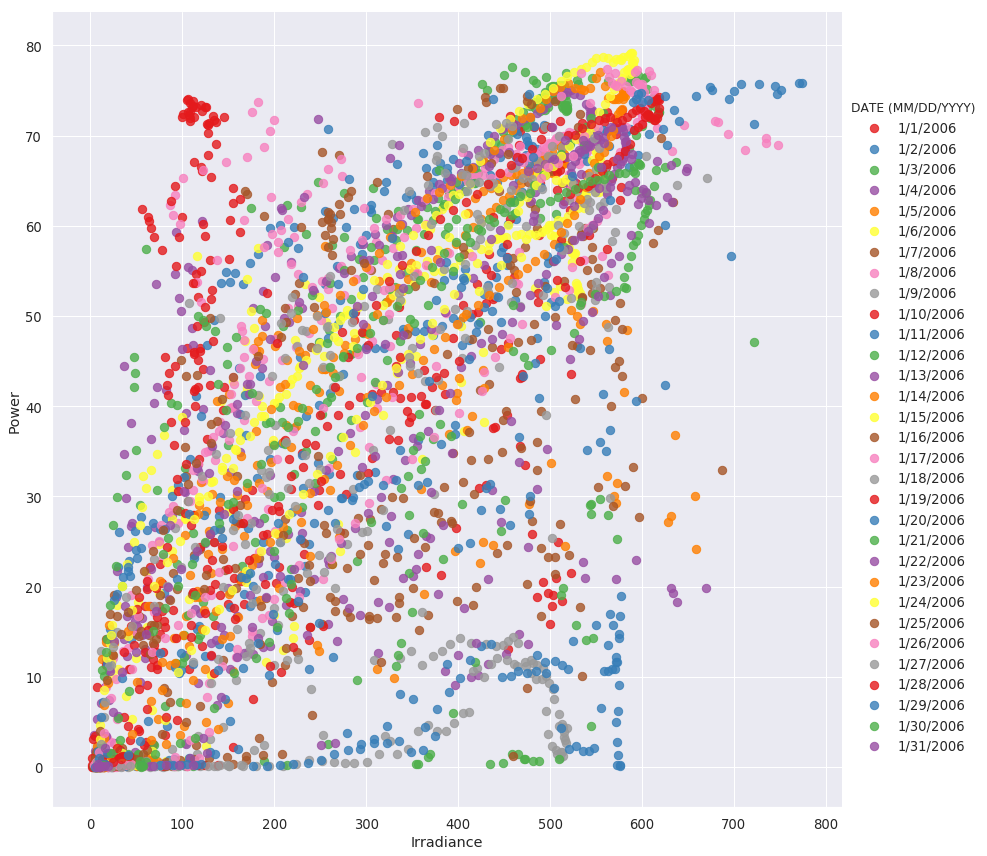

In [9]:
# Plot two parameters (Power & Irradiance)
sns.lmplot('Irradiance','Power', data=pw, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

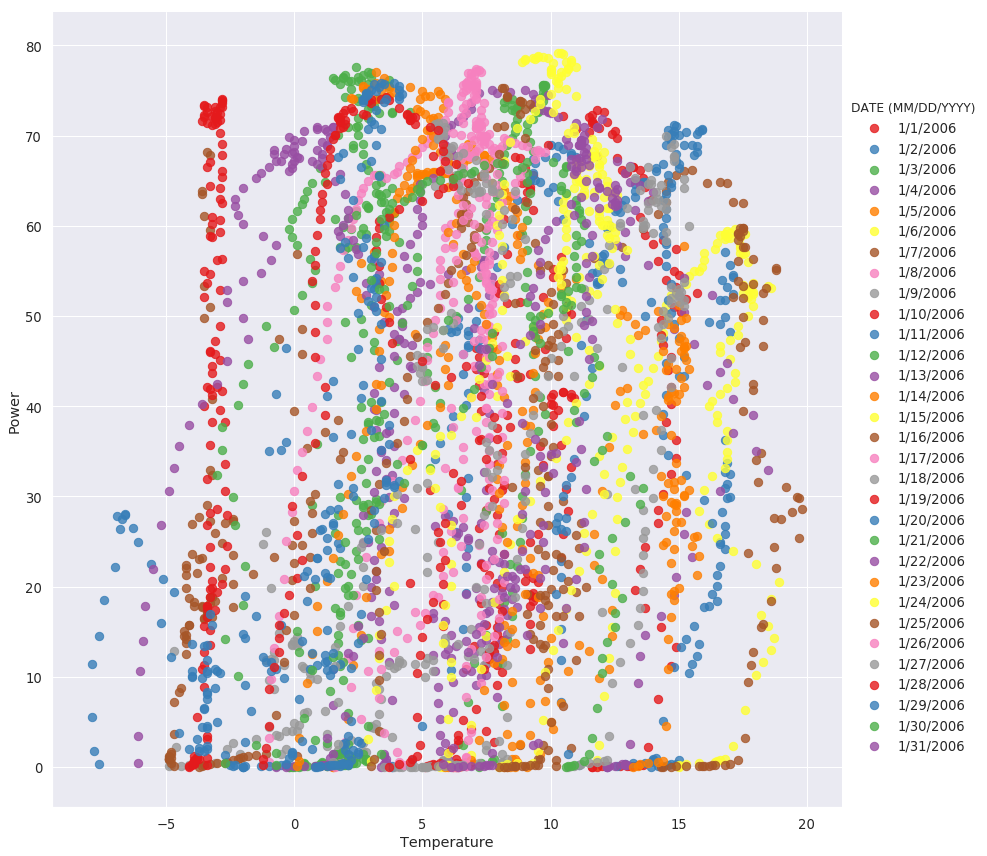

In [10]:
# Plot two parameters (Power & Temperature)
sns.lmplot('Temperature', 'Power', data=pw, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

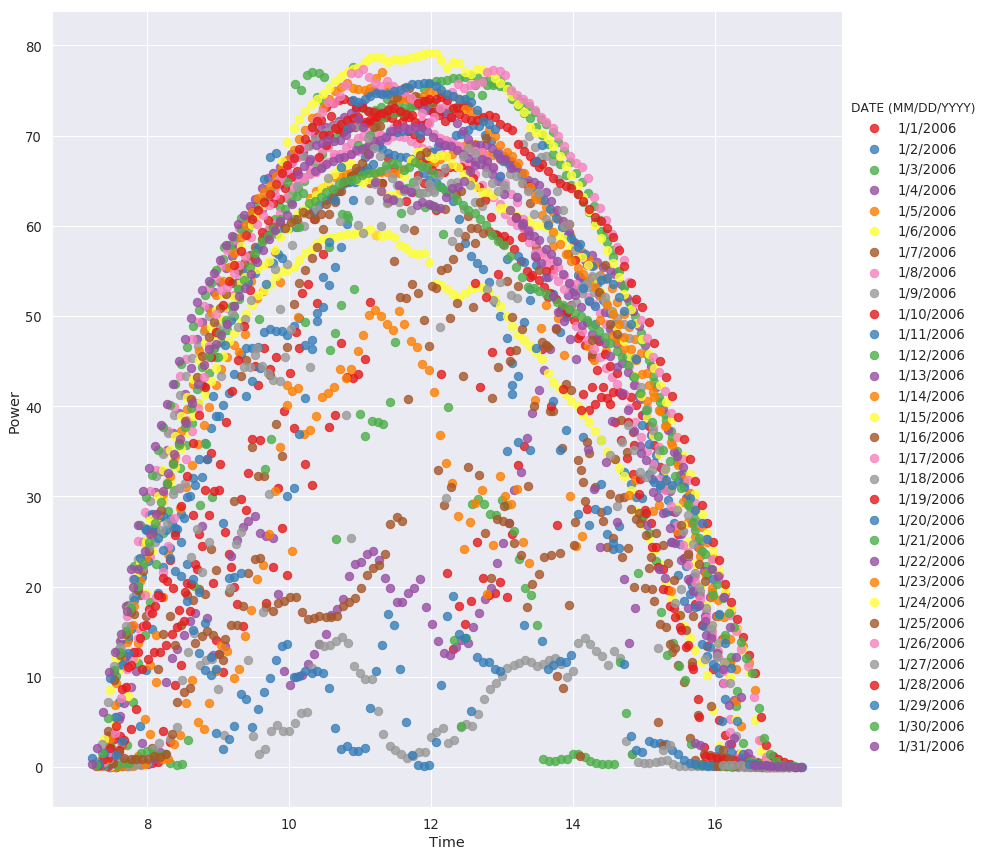

In [11]:
# Plot two parameters (Power & Time)
sns.lmplot('Time','Power', data=pw, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

In [12]:
# Columns that contain NaN values (True = Nan value)
pw.isnull().any()

DATE (MM/DD/YYYY)    False
MST                  False
Time                 False
Power                False
Irradiance           False
Temperature          False
CloudCover           False
5 min                False
Boolean              False
dtype: bool

In [13]:
# Fill NaN existing columns
pwfill = pw.fillna(method='ffill')

## Divide Data

In [14]:
# Divide data
# X variable contains Attributes
# y variable contains Labels

X = pw[['Time','Irradiance','Temperature', 'CloudCover']].values
y = pw['Power'].values


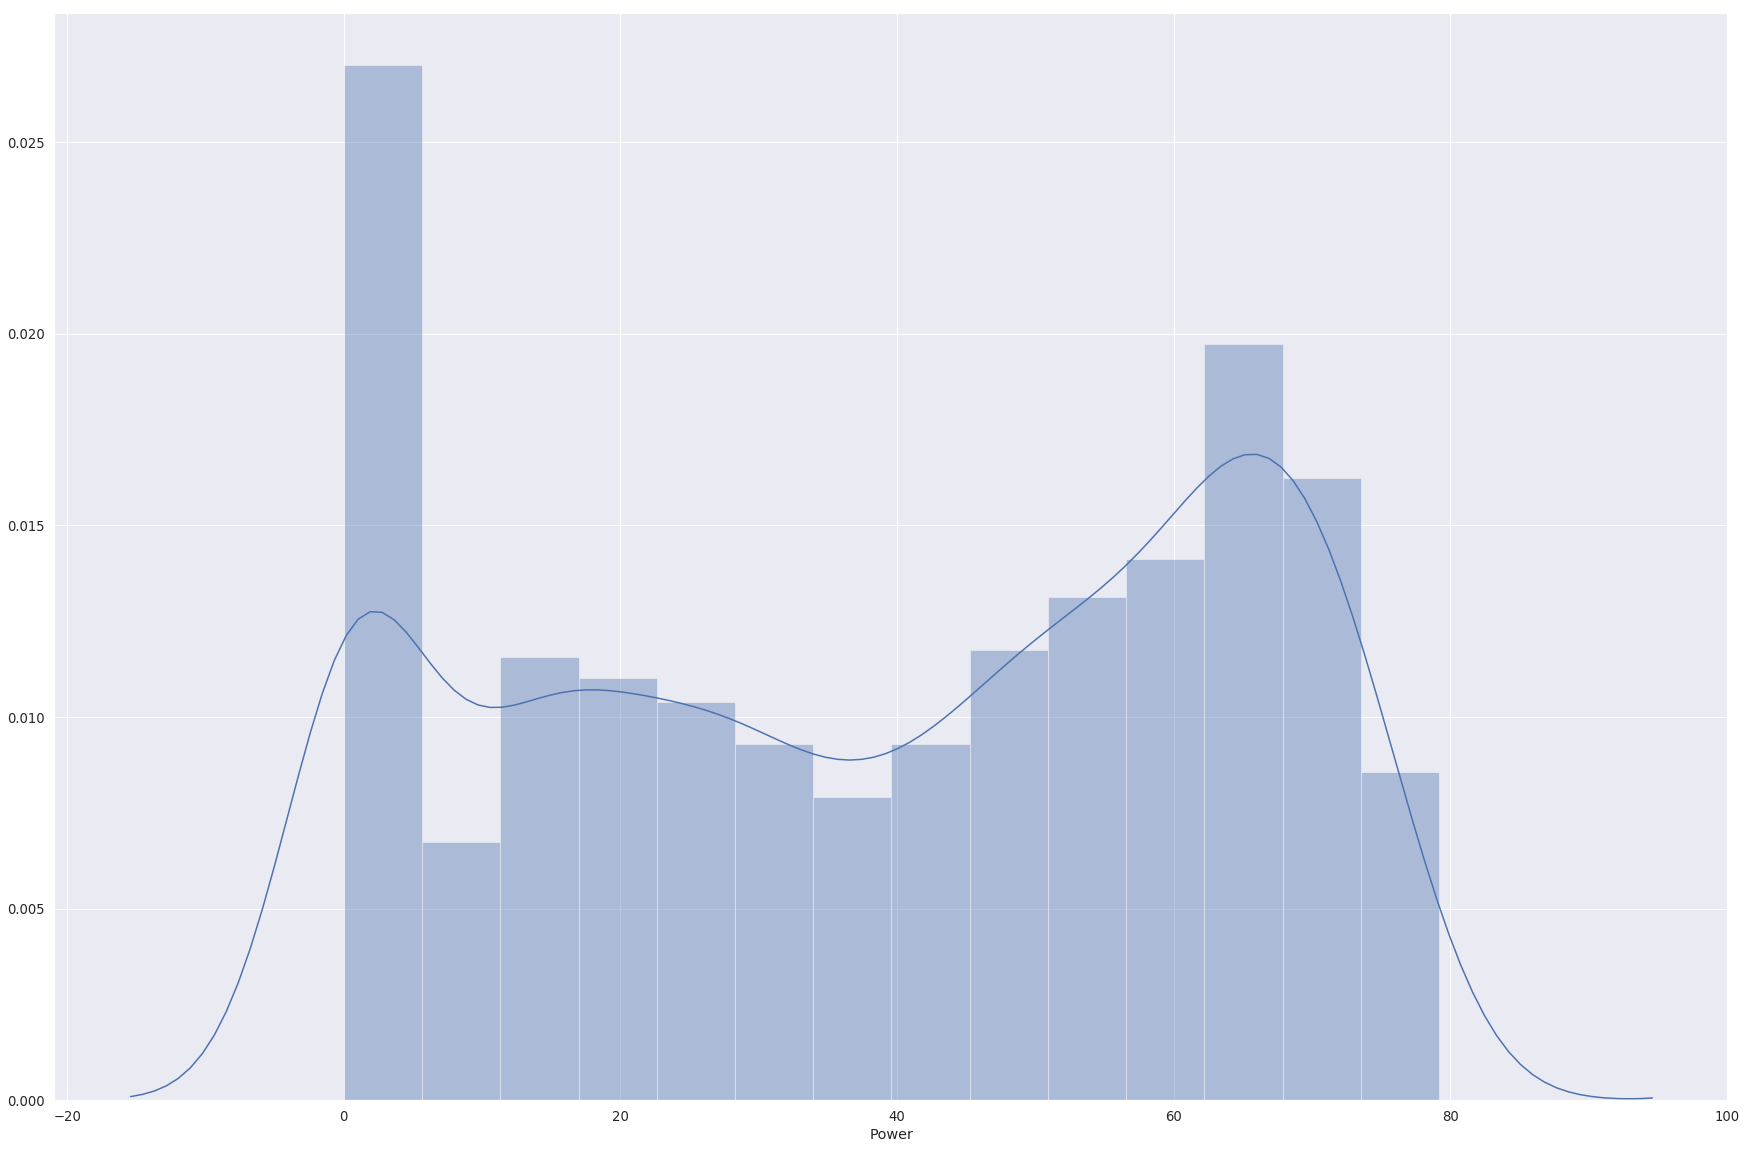

In [15]:

plt.figure(figsize=(30,20))
plt.tight_layout()
seabornInstance.distplot(pw['Power'])

## Training & Testing Data

In [16]:
# Split 90% of the data to the training set while 10% of the data to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.5637418285152134

In [19]:
# Prediction on Test Data

y_pred = regressor.predict(X_test)

In [20]:
# Difference between actual value and predicted value

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(35)

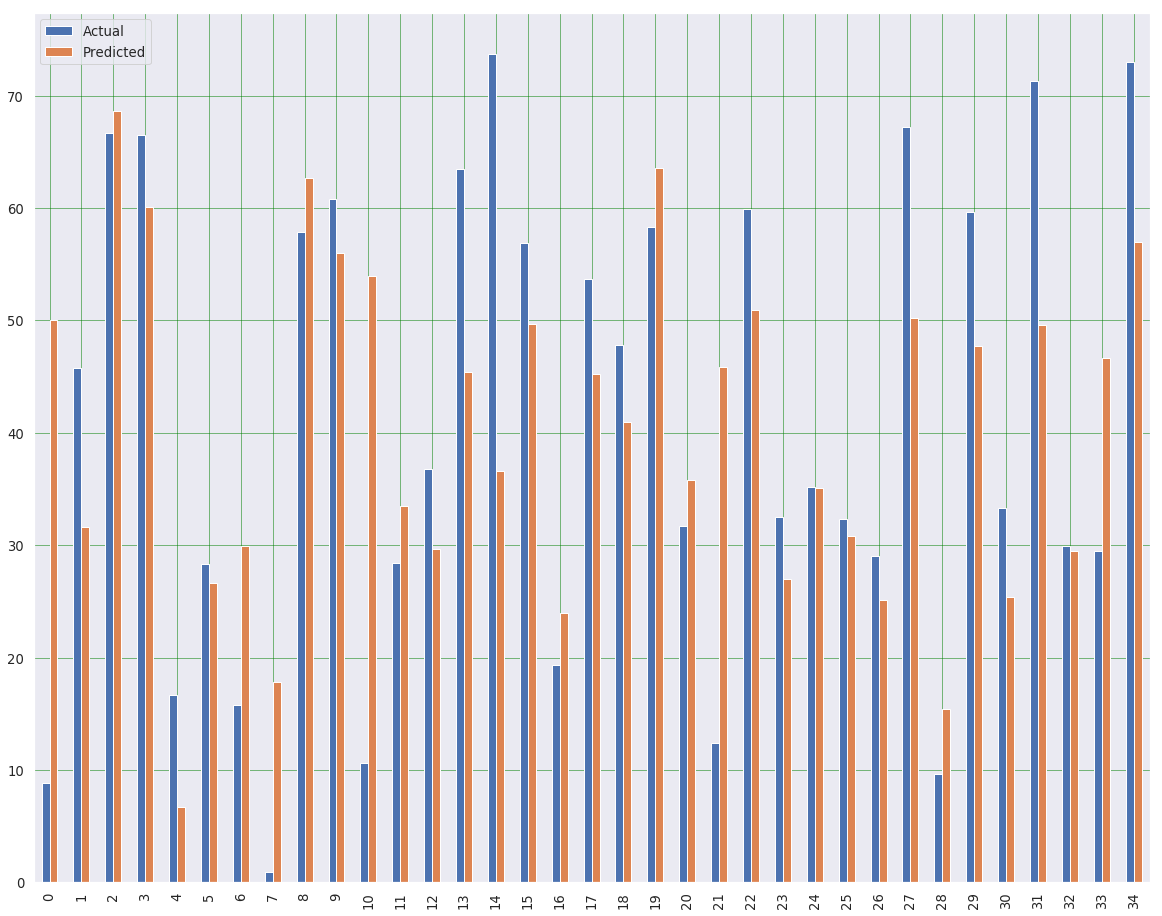

In [21]:
# Plot Actual vs Predicted Values
df1.plot(kind='bar',figsize=(20,16))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
# Find the value for MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.703288930195825
Mean Squared Error: 278.8606881200864
Root Mean Squared Error: 16.699122375744373


## Fit Model

In [ ]:
# Fit regression model

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()